In [153]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [154]:
data=pd.read_csv(r'C:\Users\Alok\Desktop\baseball.csv')
df=pd.DataFrame(data)
df

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,NewLeague
0,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,N
1,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,A
2,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,N
3,321,87,10,39,42,30,2,396,101,12,48,46,33,805,N
4,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,497,127,7,65,48,37,5,2703,806,32,379,311,138,325,N
259,492,136,5,76,50,94,12,5511,1511,39,897,451,875,313,A
260,475,126,3,61,43,52,6,1700,433,7,217,93,146,37,A
261,573,144,9,85,60,78,8,3198,857,97,470,420,332,1314,A


In [109]:
df.describe()


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts
count,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000
mean,403.642586,107.828897,11.619772,54.745247,51.486692,41.114068,7.311787,2657.543726,722.186312,69.239544,361.220532,330.418251,260.266160,290.711027
std,147.307209,45.125326,8.757108,25.539816,25.882714,21.718056,4.793616,2286.582929,648.199644,82.197581,331.198571,323.367668,264.055868,279.934575
min,19.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.000000,4.000000,0.000000,2.000000,3.000000,1.000000,0.000000
25%,282.500000,71.500000,5.000000,33.500000,30.000000,23.000000,4.000000,842.500000,212.000000,15.000000,105.500000,95.000000,71.000000,113.500000
50%,413.000000,103.000000,9.000000,52.000000,47.000000,37.000000,6.000000,1931.000000,516.000000,40.000000,250.000000,230.000000,174.000000,224.000000
75%,526.000000,141.500000,18.000000,73.000000,71.000000,57.000000,10.000000,3890.500000,1054.000000,92.500000,497.500000,424.500000,328.500000,322.500000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.000000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1377.000000


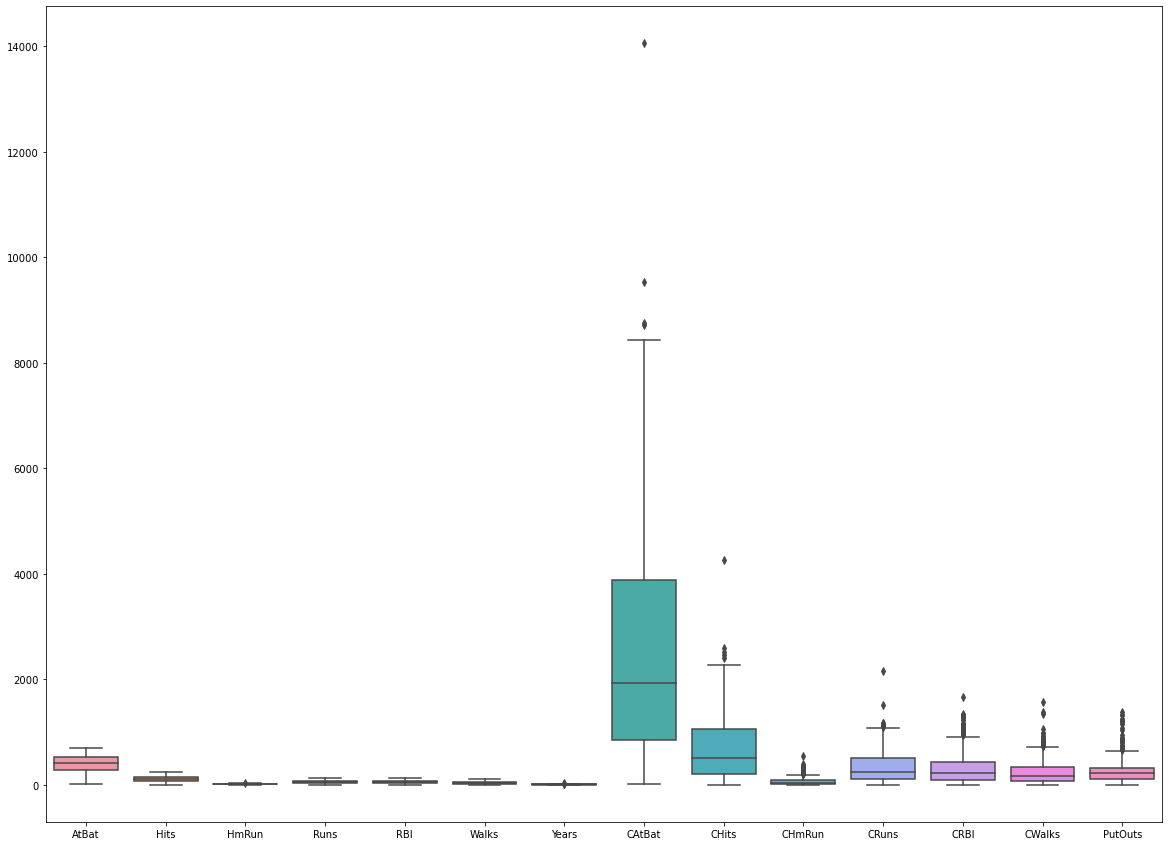

In [155]:
fig, scatter = plt.subplots(figsize = (20,15))
sns.boxplot(data=df)

In [156]:
x=['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts']


In [157]:
for i in x:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    low  = q1-(1.5*iqr) #acceptable range
    high = q3+(1.5*iqr)#acceptable range
    df[i]=np.where(df[i] > high,high,df[i])

In [158]:
df.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts
count,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000
mean,403.642586,107.828897,11.610266,54.745247,51.486692,41.114068,7.285171,2630.144487,712.186312,62.681559,354.167300,311.610266,243.072243,253.342205
std,147.307209,45.125326,8.727491,25.539816,25.882714,21.718056,4.717036,2187.278702,610.878069,62.575017,306.858489,274.661439,214.341543,179.456848
min,19.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.000000,4.000000,0.000000,2.000000,3.000000,1.000000,0.000000
25%,282.500000,71.500000,5.000000,33.500000,30.000000,23.000000,4.000000,842.500000,212.000000,15.000000,105.500000,95.000000,71.000000,113.500000
50%,413.000000,103.000000,9.000000,52.000000,47.000000,37.000000,6.000000,1931.000000,516.000000,40.000000,250.000000,230.000000,174.000000,224.000000
75%,526.000000,141.500000,18.000000,73.000000,71.000000,57.000000,10.000000,3890.500000,1054.000000,92.500000,497.500000,424.500000,328.500000,322.500000
max,687.000000,238.000000,37.500000,130.000000,121.000000,105.000000,19.000000,8462.500000,2317.000000,208.750000,1085.500000,918.750000,714.750000,636.000000


In [159]:
from sklearn.preprocessing import StandardScaler
d=df[['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts']]
scaler = StandardScaler()
scaled = scaler.fit_transform(d)
sca=pd.DataFrame(scaled,columns=['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts'])

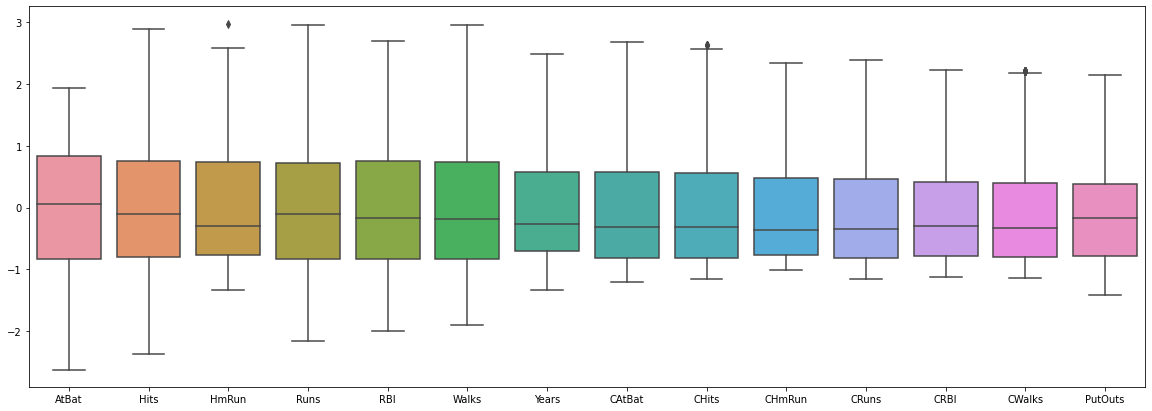

In [160]:
fig, scatter = plt.subplots(figsize = (20,7))
sns.boxplot(data=sca)

In [161]:
# Qualitative Variable
QNV = df[df.select_dtypes(include=[np.number]).columns.tolist()]
QNV.head(3)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts
0,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.00,321.0,414.0,375.0,632.0
1,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.00,224.0,266.0,263.0,636.0
2,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,208.75,828.0,838.0,354.0,200.0


In [162]:
QV = df[df.select_dtypes(include=['object']).columns.tolist()]
QV.head(3)

,NewLeague
0,N
1,A
2,N


In [163]:
from sklearn.preprocessing import LabelEncoder
QV=QV.apply(LabelEncoder().fit_transform) 
QV.head(3)

,NewLeague
0,1
1,0
2,1


In [164]:
Final_combined = pd.concat([QNV, QV],axis=1)

# Splitting the Data

In [165]:
X = Final_combined.drop("NewLeague", axis = 1)
Y = Final_combined[['NewLeague']]

In [166]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=42)

In [182]:
from sklearn.naive_bayes import GaussianNB
model= GaussianNB()
model.fit(X_train, y_train)

E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GaussianNB()

In [199]:

cols = list(X.columns) # all column present  in x  
pmax = 1
while (len(cols)>0):  # count of variable should be greater than zero
    p= []
    X_1 = X_train[cols]  # all column we are assign in x_1
    X_1 = sm.add_constant(X_1)# adding a column with value 1
    output=sm.Logit(y_train,X_1).fit() # Regression model
    p = pd.Series(output.pvalues.values[1:],index = cols) # to get p-values for all variable only     
    pmax = max(p)  # select a max P-value 
    feature_with_p_max = p.idxmax()   # idmax is used to display the variable name which has max P-value
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols

Optimization terminated successfully.
         Current function value: 0.635609
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.635611
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.635638
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.635966
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.636281
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.636612
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.637428
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.640790
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.645158
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.650829
  

In [184]:
output.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
================================================================
Model:              Logit            Pseudo R-squared: 0.033    
Dependent Variable: NewLeague        AIC:              286.9220 
Date:               2021-05-07 10:20 BIC:              296.9634 
No. Observations:   210              Log-Likelihood:   -140.46  
Df Model:           2                LL-Null:          -145.32  
Df Residuals:       207              LLR p-value:      0.0077373
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     5.0000                                      
------------------------------------------------------------------
          Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
------------------------------------------------------------------
const    -0.1606     0.2143   -0.7495   0.4535   -0.5807    0.2594
CHits     0.0044     0.0015    2.9229   0.0035    0.0015    0.0074
CRuns    -0.0087     0.0030   -2.8813   0.0040   -0.0146   -0.0028
================================================================

"""

In [185]:
Model_Odds=pd.DataFrame(np.exp(output.params),columns=["OR"])
Model_Odds

,OR
const,0.851605
CHits,1.004420
CRuns,0.991374


In [186]:
train=pd.concat([X_train,y_train],axis=1)
train.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,NewLeague
180,547.0,137.0,2.0,58.0,47.0,12.0,2.0,1038.0,271.0,3.0,129.0,80.0,24.00,261.0,0
175,299.0,75.0,6.0,38.0,23.0,26.0,3.0,580.0,160.0,8.0,71.0,33.0,44.00,212.0,1
97,584.0,158.0,15.0,70.0,84.0,42.0,5.0,2358.0,636.0,58.0,265.0,316.0,134.00,331.0,1
177,381.0,110.0,9.0,61.0,45.0,32.0,7.0,3015.0,834.0,40.0,451.0,249.0,168.00,228.0,1
60,255.0,70.0,7.0,49.0,35.0,43.0,15.0,6311.0,1661.0,154.0,1019.0,608.0,714.75,51.0,1


In [187]:
train['Probability']=output.predict(X_1)
train.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,NewLeague,Probability
180,547.0,137.0,2.0,58.0,47.0,12.0,2.0,1038.0,271.0,3.0,129.0,80.0,24.00,261.0,0,0.479230
175,299.0,75.0,6.0,38.0,23.0,26.0,3.0,580.0,160.0,8.0,71.0,33.0,44.00,212.0,1,0.482469
97,584.0,158.0,15.0,70.0,84.0,42.0,5.0,2358.0,636.0,58.0,265.0,316.0,134.00,331.0,1,0.586194
177,381.0,110.0,9.0,61.0,45.0,32.0,7.0,3015.0,834.0,40.0,451.0,249.0,168.00,228.0,1,0.403728
60,255.0,70.0,7.0,49.0,35.0,43.0,15.0,6311.0,1661.0,154.0,1019.0,608.0,714.75,51.0,1,0.159261


In [188]:
train['Predicted']=np.where(train['Probability'] > 0.6,1,0) 
train.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,NewLeague,Probability,Predicted
180,547.0,137.0,2.0,58.0,47.0,12.0,2.0,1038.0,271.0,3.0,129.0,80.0,24.00,261.0,0,0.479230,0
175,299.0,75.0,6.0,38.0,23.0,26.0,3.0,580.0,160.0,8.0,71.0,33.0,44.00,212.0,1,0.482469,0
97,584.0,158.0,15.0,70.0,84.0,42.0,5.0,2358.0,636.0,58.0,265.0,316.0,134.00,331.0,1,0.586194,0
177,381.0,110.0,9.0,61.0,45.0,32.0,7.0,3015.0,834.0,40.0,451.0,249.0,168.00,228.0,1,0.403728,0
60,255.0,70.0,7.0,49.0,35.0,43.0,15.0,6311.0,1661.0,154.0,1019.0,608.0,714.75,51.0,1,0.159261,0


In [189]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(train['NewLeague'], train['Predicted'])
print(matrix)

[[103   7]
 [ 81  19]]


Text(0.5, 257.44, 'Predicted label')

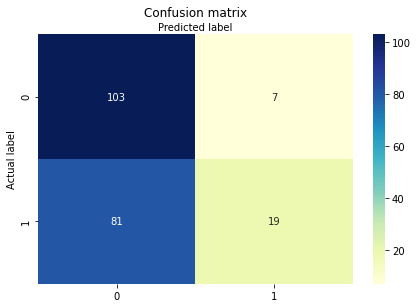

In [190]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [174]:
Accuracy_Train=((103+19)/(210)*100)
print(Accuracy_Train)

58.0952380952381


In [191]:
print("Accuracy:",metrics.accuracy_score(train['NewLeague'], train['Predicted']))
print("Precision:",metrics.precision_score(train['NewLeague'], train['Predicted']))
print("Recall:",metrics.recall_score(train['NewLeague'], train['Predicted']))

Accuracy: 0.580952380952381
Precision: 0.7307692307692307
Recall: 0.19


In [176]:
from sklearn.metrics import classification_report
print(classification_report(train['NewLeague'], train['Predicted']))

              precision    recall  f1-score   support

           0       0.56      0.94      0.70       110
           1       0.73      0.19      0.30       100

    accuracy                           0.58       210
   macro avg       0.65      0.56      0.50       210
weighted avg       0.64      0.58      0.51       210



# Test

In [192]:
test["Predicted"]=model.predict(X_test)

In [193]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test,test["Predicted"] )
cnf_matrix

array([[14, 17],
       [ 7, 15]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

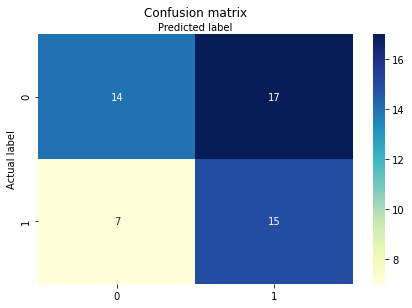

In [198]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [197]:
Accuracy_Test=((14+15)/(53)*100)
print(Accuracy_Test)

54.71698113207547


In [196]:
print("Accuracy:",metrics.accuracy_score(y_test, test["Predicted"]))
print("Precision:",metrics.precision_score(y_test, test["Predicted"]))
print("Recall:",metrics.recall_score(y_test, test["Predicted"]))

Accuracy: 0.5471698113207547
Precision: 0.46875
Recall: 0.6818181818181818
